This chapter is adapted from Matthew Crump's excellent [Answering questions with data](https://crumplab.github.io/statistics/) book.  The main text has mainly be left intact with a few modifications, also the code adapted to use python and jupyter.

# Describing Data


>"Far better an approximate answer to the right question, which is often vague, than an exact answer to the wrong question, which can always be made precise." ---John W. Tukey


This chapter is about **descriptive statistics**. These are tools for describing data. Some things to keep in mind as we go along are:

  1. There are lots of different ways to describe data
  2. There is more than one "correct" way, and you get to choose the most "useful" way for the data that you are describing
  3. It is possible to invent new ways of describing data, all of the ways we discuss were previously invented by other people, and they are commonly used because they are useful.
  4. Describing data is necessary because there is usually too much of it, so it doesn't make any sense by itself.
  

## This is what too many numbers looks like

Let's say you wanted to know how happy people are. So, you ask thousands of people on the street how happy they are. You let them pick any number they want from negative infinity to positive infinity. Then you record all the numbers. Now what?

Well, how about you look at the numbers and see if that helps you determine anything about how happy people are. What could the numbers look like. Perhaps something like this:



In [24]:
import numpy as np
import pandas as pd
happiness=np.random.normal(0, 500, 200).round(1)
happiness.resize(20,10)
pd.DataFrame(happiness)

0       1      2      3       4       5      6      7       8       9
0   474.9   666.5 -247.6 -725.4   235.2   343.6  403.2  -69.2   382.1  -564.8
1   -18.6  -294.6  165.4 -384.5  -103.1  -108.2  647.3 -632.2   142.7   210.7
2  -117.8   477.0 -108.4 -243.0    30.2  -379.0 -354.4  -10.5  -172.1   118.7
3    99.6  -329.4  129.5  889.4   397.7  -736.7  762.8  325.0   682.5   396.3
4   256.0  1159.0  425.9   14.3   398.1   310.5  380.2  256.0   813.2   618.6
5   -41.2  -324.3 -600.5  625.7   457.6  -217.5 -162.9   22.8   229.3   510.3
6  -250.7  -380.8  136.8  319.8  -785.3  1154.9 -653.8  104.5  -898.8   125.6
7   770.6   274.2  -79.5   64.7  -368.0   885.5  -19.8  877.3    52.9  -160.4
8   405.8  -317.5  249.5 -387.6   103.4   -26.6 -911.5 -103.6   581.8   177.0
9   614.3   -57.1  379.8 -249.7  -163.8  -157.0   60.5  138.5   222.3   -92.9
10  268.2   384.9  -76.7   84.9 -1248.6   -70.1 -292.9 -414.2  -234.5  -251.0
11  -66.3  -606.4  170.1 -163.0   -23.2   205.1 -201.2 -510.4    33.6  -607.4
12   20.0    57.6  363.6  991.7  -122.7  -233.4 -148.5  200.2  -209.3    54.9
13 -187.1    -2.0  425.5  876.5    -5.9  -363.6 -823.9  363.4    66.1  -225.2
14 -884.5    82.6  453.1 -183.6 -1118.8  -243.1  242.2   13.5   221.2  -446.8
15 -332.1   131.4 -140.0  246.1   575.5   492.7  460.6 -520.1  -544.0   171.0
16 -163.5   382.8  442.2  984.8  -283.4   565.1  485.8  234.6   441.4  -733.1
17  -36.3   -99.0 -513.4    0.9  -273.9   199.2   13.7 -249.1  -635.2  -411.4
18    8.6   609.8 -300.7  345.6    68.1  -399.2  -13.1  305.9 -1064.4 -1510.9
19 -280.6    44.2 -677.8  322.6   239.9   262.4 -373.7  -98.5  -858.6    87.0

Now, what are you going to with that big pile of numbers? Look at it all day long? When you deal with data, it will deal so many numbers to you that you will be overwhelmed by them. That is why we need ways to describe the data in a more manageable fashion. 

The complete description of the data is always the data itself. **Descriptive statistics** and other tools for describing data go one step further to summarize aspects of the data. Summaries are a way to compress the important bits of a thing down to a useful and manageable tidbit. It's like telling your friends why they should watch a movie: you don't replay the entire movie for them, instead you hit the highlights. Summarizing the data is just like a movie preview, only for data.


## Look at the data

We already tried one way of looking at the numbers, and it wasn't useful. Let's look at some other ways of looking at the numbers, using graphs.

### Dots everywhere

Let's turn all of the numbers into dots, then show them in a graph. Note, when we do this, we have not yet summarized anything about the data. Instead, we just look at all of the data in a visual format, rather than looking at the numbers. 


Text(0.5, 0, 'index')

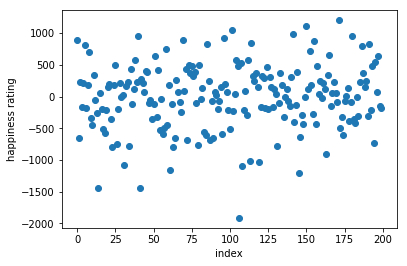

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
happiness=np.random.normal(0, 500, 200).round(1)
plt.plot(happiness,'o')
plt.ylabel('happiness rating')
plt.xlabel('index')

The Figure above shows 200 measurements of happiness. The graph has two axes. The horizontal **x-axis**, going from left to right is labeled "Index". The vertical **y-axis**, going up and down, is labelled "happiness". Each dot represents one measurement of every person's happiness from our pretend study. Before we talk about what we can and cannot see about the data, it is worth mentioning that the way you plot the data will make some things easier to see and some things harder to see. So, what can we now see about the data?

There are lots of dots everywhere. It looks like there are 200 of them because the index goes to 200. It looks like some dots go as high as 100 and as low as -1500. It looks like there are more dots in the middle-ish area of the plot, sort of spread about 0. 

>Take home: we can see all the numbers at once by putting them in a plot, and that is much easier and more helpful than looking at the raw numbers.

OK, so if these dots represent how happy 200 people are, what can we say about those people? First, the dots are kind of all over the place, so different people have different levels of happiness. Are there any trends? Are more people happy than unhappy, or vice-versa? It's hard to see that in the graph, so let's make a different one, called a **histogram**

### Histograms

Making a histogram will be our first act of officially summarizing something about the data. We will no longer look at the individual bits of data, instead we will see how the numbers group together. Let's look at a histogram of the happiness data, and then explain it.

(array([ 1.,  2.,  6., 10., 23., 49., 55., 32., 14.,  8.]),
 array([-1913.6 , -1601.96, -1290.32,  -978.68,  -667.04,  -355.4 ,
          -43.76,   267.88,   579.52,   891.16,  1202.8 ]),
 <a list of 10 Patch objects>)

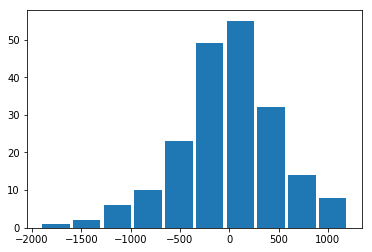

In [60]:
plt.hist(happiness, rwidth=0.90)

The `plt.hist()` function in python returns a picture of the histogram but also a list containing the height of the bars and the intervalues used to determine the bin widths.

The dots have disappeared, and now we some bars. Each bar is a summary of the dots, representing the number of dots (frequency count) inside a particular range of happiness, also called **bins**. For example, how many people gave a happiness rating between about -200 and 100? The midd bar, the one around zero on the x-axis, tells you how many. Look how tall that bar is. How tall is it? The height is shown on the y-axis, which provides a frequency count (the number of dots or data points). It looks like around 35 people said their happiness was between -200 and 100.  

More generally, we see there are many bins on the x-axis. We have divided the data into bins of about 200-300. Bin \#1 goes from -1500 to -1200, bin \#2 goes from -1200 to -900, and so on until the last bin. To make the histogram, we just count up the number of data points falling inside each bin, then plot those frequency counts as a function of the bins. Voila, a histogram.

What does the histogram help us see about the data? First, we can see the **shape** of data. The shape of the histogram refers to how it goes up and down. The shape tells us where the data is. For example, when the bars are low we know there isn't much data there. When the bars are high, we know there is more data there. So, where is most of the data? It looks like it's mostly in the middle two bins around 0. We can also see the **range** of the data. This tells us the minimums and the maximums of the data. Most of the data is between -1500 and 1000, so no infinite sadness or infinite happiness in our data-set.

When you make a histogram you get to choose how wide each bar will be. For example, below are four different histograms of the very same happiness data. What changes is the width of the bins. 

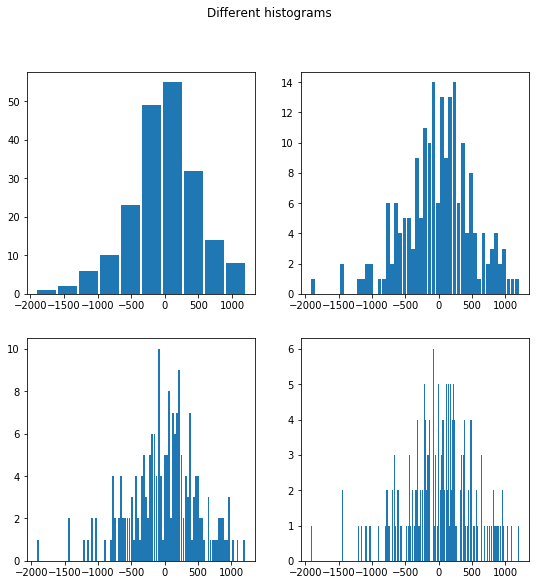

In [58]:
plt.figure(figsize=(9, 9))
plt.subplot(221)
plt.hist(happiness, bins=10,rwidth=0.90)
plt.subplot(222)
plt.hist(happiness, bins=50, rwidth=0.90)
plt.subplot(223)
plt.hist(happiness, bins=100, rwidth=0.90)
plt.subplot(224)
plt.hist(happiness, bins=200, rwidth=0.90)
plt.suptitle('Different histograms')
plt.show()

All of the histograms have roughly the same overall shape: From left to right, the bars start off small, then go up, then get small again. In other words, as the numbers get closer to zero, they start to occur more frequently. We see this general trend across all the histograms. But, some aspects of the trend fall apart when the bars get really narrow. For example, although the bars generally get taller when moving from -1000 to 0, there are some exceptions and the bars seem to fluctuate a little bit. When the bars are wider, there are less exceptions to the general trend. How wide or narrow should your histogram be? It's a Goldilocks question. Make it just right for your data.


## Important Ideas: Distribution, Central Tendency, and Variance

Let's introduce three important terms we will use a lot, **distribution**, **central tendency**, and **variance**. These terms are similar to their everyday meanings (although I suspect most people don't say central tendency very often).

**Distribution.** When you order something from Amazon, where does it come from, and how does it get to your place? That stuff comes from one of Amazon's distribution centers. They distribute all sorts of things by spreading them around to your doorstep. "To Distribute"" is to spread something. Notice, the data in the histogram is distributed, or spread across the bins. We can also talk about a distribution as a noun. The histogram is a distribution of the frequency counts across the bins. Distributions are **very, very, very, very, very** important. They can have many different shapes. They can describe data, like in the histogram above. And as we will learn in later chapters, they can **produce** data. Many times we will be asking questions about where our data came from, and this usually means asking what kind of distribution could have created our data (more on that later.)

**Central Tendency** is all about sameness: What is common about some numbers? For example, is there anything similar about all of the numbers in the histogram? Yes, we can say that most of them are near 0. There is a tendency for most of the numbers to be centered near 0. Notice we are being cautious about our generalization about the numbers. We are not saying they are all 0. We are saying there is a tendency for many of them to be near zero. There are lots of ways to talk about the central tendency of some numbers. There can even be more than one kind of tendency. For example, if lots of the numbers were around -1000, and a similar large amount of numbers were grouped around 1000, we could say there was two tendencies.

**Variance** is all about differentness: What is different about some numbers?. For example, is there anything different about all of the numbers in the histogram? YES!!! The numbers are not all the same! When the numbers are not all the same, they must vary. So, the variance in the numbers refers to how the numbers are different. There are many ways to summarize the amount of variance in the numbers, and we discuss these very soon.



## Measures of Central Tendency (Sameness)

We've seen that we can get a sense of data by plotting dots in a graph, and by making a histogram. These tools show us what the numbers look like, approximately how big and small they are, and how similar and different they are from another. It is good to get a feeling about the numbers in this way. But, these visual sensitudes are not very precise. In addition to summarizing numbers with graphs, we can summarize numbers using numbers (NO, please not more numbers, we promise numbers can be your friend).

### From many numbers to one

Measures of central have one important summary goal: to reduce a pile of numbers to a single number that we can look at. We already know that looking at thousands of numbers is hopeless. Wouldn't it be nice if we could just look at one number instead? We think so. It turns out there are lots of ways to do this. Then, if your friend ever asks the frightening question, "hey, what are all these numbers like?". You can say they are like this one number right here.

But, just like in Indiana Jones and the Last Crusade (highly recommended movie), you must choose your measure of central tendency wisely. 

### Mode

The **mode** is the most frequently occurring number in your measurement. That is it. How do you find it? You have to count the number of times each number appears in your measure, then whichever one occurs the most, is the mode.

> Example: 1 1 1 2 3 4 5 6

The mode of the above set is 1, which occurs three times. Every other number only occurs once.

OK fine. What happens here:

> Example: 1 1 1 2 2 2 3 4 5 6

Hmm, now 1 and 2 both occur three times each. What do we do? We say there are two modes, and they are 1 and 2.

Why is the mode a measure of central tendency? Well, when we ask, "what are my numbers like", we can say, "most of the number are, like a 1 (or whatever the mode is)".

Is the mode a good measure of central tendency? That depends on your numbers. For example, consider these numbers

> 1 1 2 3 4 5 6 7 8 9

Here, the mode is 1 again, because there are two 1s, and all of the other numbers occur once. But, are most of the numbers like, a 1. No, they are mostly not 1s. 

"Argh, so should I or should I not use the mode? I thought this class was supposed to tell me what to do?". There is no telling you what to do. Every time you use a tool in statistics you have to think about what you are doing and justify why what you are doing makes sense. Sorry.

### Median

The **median** is the exact middle of the data. After all, we are asking about central tendency, so why not go to the center of the data and see where we are. What do you mean middle of the data? Let's look at these numbers:

> 1 5 4 3 6 7 9

Umm, OK. So, three is in the middle? Isn't that kind of arbitrary. Yes. Before we can compute the median, we need to order the numbers from smallest to largest.

> 1 3 4 **5** 6 7 9

Now, 5 is in the middle. And, by middle we mean in the middle. There are three numbers to the left of 5, and three numbers to the right. So, five is definitely in the middle.

OK fine, but what happens when there aren't an even number of numbers? Then the middle will be missing right? Let's see:

> 1 2 3 4 5 6

There is no number between 3 and 4 in the data, the middle is empty. In this case, we compute the median by figuring out the number in between 3 and 4. So, the median would be 3.5.

Is the median a good measure of central tendency? Sure, it is often very useful. One property of the median is that it stays in the middle even when some of the other numbers get really weird. For example, consider these numbers:

> 1 2 3 4 4 4 **5** 6 6 6 7 7 1000

Most of these numbers are smallish, but the 1000 is a big old weird number, very different from the rest. The median is still 5, because it is in the middle of these ordered numbers. We can also see that five is pretty similar to most of the numbers (except for 1000). So, the median does a pretty good job of representing most of the numbers in the set, and it does so even if one or two of the numbers are very different from the others.

Finally, **outlier** is a term will we use to describe numbers that appear in data that are very different from the rest. 1000 is an outlier, because it lies way out there on the number line compared to the other numbers. What to do with outliers is another topic we discuss sometimes throughout this course.

### Mean

Have you noticed this is a textbook about statistics that hasn't used a formula yet? That is about to change, but for those of you with formula anxiety, don't worry, we will do our best to explain them.

The **mean** is also called the average. And, we're guessing you might already now what the average of a bunch of numbers is? It's the sum of the numbers, divided by the number of number right? How do we express that idea in a formula? Just like this:

$Mean = \bar{X} = \frac{\sum_{i=1}^{n} x_{i}}{N}$

"That looks like Greek to me". Yup. The $\sum$ symbol is called **sigma**, and it stands for the operation of summing. The little "i" on the bottom, and the little "n" on the top refers to all of the numbers in the set, from the first number "i" to the last number "n". The letters are just arbitrary labels, called **variables** that we use for descriptive purposes. The $x_{i}$ refers to individual numbers in the set. We sum up all of the numbers, then divide the sum by $N$, which is the total number of numbers. Sometimes you will see $\bar{X}$ to refer to the mean of all of the numbers.

In plain English, the formula looks like:

$mean = \frac{\text{Sum of my numbers}}{\text{Count of my numbers}}$

"Well, why didn't you just say that?". We just did.

Let's compute the mean for these five numbers:

> 3 7 9 2 6

Add em up:

> 3+7+9+2+6 = 27

Count em up:

> $i_{1}$ = 3, $i_{2}$ = 7, $i_{3}$ = 9, $i_{4}$ = 2, $i_{5}$ = 6; N=5, because $i$ went from 1 to 5

Divide em:

> mean = 27 / 5 = 5.4

Or, to put the numbers in the formula, it looks like this:

$Mean = \bar{X} = \frac{\sum_{i=1}^{n} x_{i}}{N} = \frac{3+7+9+2+6}{5} = \frac{27}{5} = 5.4$

OK fine, that is how to compute the mean. But, like we imagined, you probably already knew that, and if you didn't that's OK, now you do. What's next?

Is the mean a good measure of central tendency? By now, you should know: it depends. 

### What does the mean mean?

It is not enough to know the formula for the mean, or to be able to use the formula to compute a mean for a set of numbers. We believe in your ability to add and divide numbers. What you really need to know is what the mean really "means". This requires that you know what the mean does, and not just how to do it. Puzzled? Let's explain.

Can you answer this question: What happens when you divide a sum of numbers by the number of numbers? What are the consequences of doing this? What is the formula doing? What kind of properties does the result give us? FYI, the answer is not that we compute the mean.

OK, so what happens when you divide any number by another number? Of course, the key word here is divide. We literally carve the number up top in the numerator into pieces. How many times do we split the top number? That depends on the bottom number in the denominator. Watch:

$\frac{12}{3} = 4$

So, we know the answer is 4. But, what is really going on here is that we are slicing and dicing up 12 aren't we. Yes, and we slicing 12 into three parts. It turns out the size of those three parts is 4. So, now we are thinking of 12 as three different pieces $12 = 4 + 4 + 4$. I know this will be obvious, but what kind of properties do our pieces have? You mean the fours? Yup. Well, obviously they are all fours. Yes. The pieces are all the same size. They are all equal. So, division equalizes the numerator by the denominator...

"Umm, I think I learned this in elementary school, what does this have to do with the mean?". The number on top of the formula for the mean is just another numerator being divided by a denominator isn't it. In this case, the numerator is a sum of all the values in your data. What if it was the sum of all of the 500 happiness ratings? The sum of all of them would just be a single number adding up all the different ratings. If we split the sum up into equal parts representing one part for each person's happiness what would we get? We would get 500 identical and equal numbers for each person. It would be like taking all of the happiness in the world, then dividing it up equally, then to be fair, giving back the same equal amount of happiness to everyone in the world. This would make some people more happy than they were before, and some people less happy right. Of course, that's because it would be equalizing the distribution of happiness for everybody. This process of equalization by dividing something into equal parts is what the **mean** does. See, it's more than just a formula. It's an idea. This is just the beginning of thinking about these kinds of ideas. We will come back to this idea about the mean, and other ideas, in later chapters.

> Pro tip: The mean is the one and only number that can take the place of every number in the data, such that when you add up all the equal parts, you get back the original sum of the data.

### All together now

Just to remind ourselves of the mode, median, and mean, take a look at the next histogram. We have overlaid the location of the mean (red), median (green), and mode (blue). For this dataset, the three measures of central tendency all give different answers. The mean is the largest because it is influenced by large numbers, even if they occur rarely. The mode and median are insensitive to large numbers that occur infrequently, so they have smaller values.

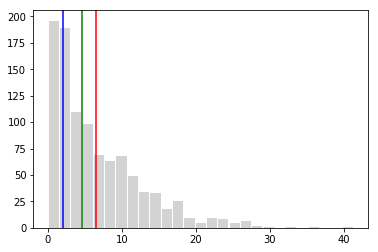

In [77]:
def my_mode(array):
    counts = np.bincount(array.astype(int))
    amax=np.argmax(counts)
    return amax

exp_num=np.random.exponential(scale=1/.15, size=1000).round(1)
plt.hist(exp_num, bins='auto', rwidth=0.90, color="lightgrey")
plt.axvline(x=exp_num.mean(),color="red")
plt.axvline(x=np.median(exp_num),color="green")
plt.axvline(x=my_mode(exp_num),color="blue")


## Measures of Variation (Differentness)

What did you do when you wrote essayss in high school about a book you read? Probably compare and contrast something right? When you summarize data, you do the same thing. Measures of central tendency give us something like comparing does, they tell us stuff about what is the same. Measures of variation give us something like contrasting does, they tell us stuff about what is different.

First, we note that whenever you see a bunch of numbers that aren't the same, you already know there are some differences. This means the numbers vary, and there is variation in the size of the numbers.

### The Range

Consider these 10 numbers, that I already ordered from smallest to largest for you:

> 1 3 4 5 5 6 7 8 9 24

The numbers have variation, because they are not all the same. We can use the range to describe the width of the variation. The range refers to the **minimum** (smallest value) and **maximum** (largest value) in the set. So, the range would be 1 and 24.

The range is a good way to quickly summarize the boundaries of your data in just two numbers. By computing the range we know that none of the data is larger or smaller than the range. And, it can alert you to outliers. For example, if you are expecting your numbers to be between 1 and 7, but you find the range is 1 - 340,500, then you know you have some big numbers that shouldn't be there, and then you can try to figure out why those numbers occurred (and potentially remove them if something went wrong).

### The Difference Scores

It would be nice to summarize the amount of differentness in the data. Here's why. If you thought that raw data (lots of numbers) is too big to look at, then you will be frightened to contemplate how many differences there are to look at. For example, these 10 numbers are easy to look at:

> 1 3 4 5 5 6 7 8 9 24

But, what about the difference between the numbers, what do those look like? We can compute the difference scores between each number, then put them in a matrix like the one below:


In [88]:
numbers=np.array([1, 3, 4, 5, 5, 6, 7, 8, 9, 24])
differences = np.transpose(np.tile(numbers, (10,1)))-numbers
pd.DataFrame(differences)

0   1   2   3   4   5   6   7   8   9
0   0  -2  -3  -4  -4  -5  -6  -7  -8 -23
1   2   0  -1  -2  -2  -3  -4  -5  -6 -21
2   3   1   0  -1  -1  -2  -3  -4  -5 -20
3   4   2   1   0   0  -1  -2  -3  -4 -19
4   4   2   1   0   0  -1  -2  -3  -4 -19
5   5   3   2   1   1   0  -1  -2  -3 -18
6   6   4   3   2   2   1   0  -1  -2 -17
7   7   5   4   3   3   2   1   0  -1 -16
8   8   6   5   4   4   3   2   1   0 -15
9  23  21  20  19  19  18  17  16  15   0

We are looking at all of the possible differences between each number and every other number. So, in the top left, the difference between 1 and itself is 0. One column over to the right, the difference between 3 and 1 (3-1) is 2, etc. As you can see, this is a 10x10 matrix, which means there are 100 differences to look at. Not too bad, but if we had 500 numbers, then we would have 500*500 = 250,000 differences to look at (go for it if you like looking at that sort of thing). 

Pause for a simple question. What would this matrix look like if all of the 10 numbers in our data were the same number? It should look like a bunch of 0s right? Good. In that case, we could easily see that the numbers have no variation.

But, when the numbers are different, we can see that there is a very large matrix of difference scores. How can we summarize that? How about we apply what we learned from the previous section on measures of central tendency. We have a lot of differences, so we could ask something like, what is the average difference that we have? So, we could just take all of our differences, and compute the mean difference right? What do you think would happen if we did that?

Let's try it out on these three numbers:

> 1 2 3

In [89]:
numbers=np.array([1, 2, 3])
differences = np.transpose(np.tile(numbers, (3,1)))-numbers
pd.DataFrame(differences)

0  1  2
0  0 -1 -2
1  1  0 -1
2  2  1  0

You might already guess what is going to happen. Let's compute the mean:

$\text{mean of difference scores} = \frac{0+1+2-1+0+1-2-1+0}{9} = \frac{0}{9} = 0$

Uh oh, we get zero for the mean of the difference scores. This will always happen whenever you take the mean of the difference scores. We can see that there are some differences between the numbers, so using 0 as the summary value for the variation in the numbers doesn't make much sense.

Furthermore, you might also notice that the matrices of difference scores are redundant. The diagonal is always zero, and numbers on one side of the diagonal are the same as the numbers on the other side, except their signs are reversed. So, that's one reason why the difference scores add up to zero.

These are little problems that can be solved by computing the **variance** and the **standard deviation**. For now, the standard deviation is a just a trick that we use to avoid getting a zero. But, later we will see it has properties that are important for other reasons.

### The Variance

Variability, variation, variance, vary, variable, varying, variety. Confused yet? Before we describe **the variance**, we want to you be OK with how this word is used. First, don't forget the big picture. We know that variability and variation refers to the big idea of differences between numbers. We can even use the word variance in the same way. When numbers are different, they have variance.

The formulas for variance and standard deviation depend on whether you think your data represents an entire population of numbers, or is sample from the population. We discuss this issue in later on. For now, we divide by N, later we discuss why you will often divide by N-1 instead.

The word **variance** also refers to a specific summary statistic, the sum of the squared deviations from the mean. Hold on what? Plain English please. The variance is the sum of the squared difference scores, where the difference scores are computed between each score and the mean. What are these scores? The scores are the numbers in the data set. Let's see the formula in English first:

$variance = \frac{\text{Sum of squared difference scores}}{\text{Number of Scores}}$

#### Deviations from the mean, Difference scores from the mean

We got a little bit complicated before when we computed the difference scores between all of the numbers in the data. Let's do it again, but in a more manageable way. This time, we calculate the difference between each score and the mean. The idea here is

1. We can figure out how similar our scores are by computing the mean
2. Then we can figure out how different our scores are from the mean

This could tell us, 1) something about whether our scores are really all very close to the mean (which could help us know if the mean is good representative number of the data), and 2) something about how much differences there are in the numbers.

Take a look at this table:

In [107]:
from IPython.display import HTML, Markdown, Image, display
import math

scores=np.arange(1,6+1)
values=np.array([1,6,4,2,6,8])
mean_scores=np.mean(values)
difference_from_mean=values-mean_scores
df=pd.DataFrame({"scores": scores, "values": values, "mean scores": mean_scores, "diff from mean": difference_from_mean})
print(df)

display(Markdown("----"))
display(Markdown("**Sums**"))
print(df.sum())

display(Markdown("----"))
display(Markdown("**Means**"))
print(df.mean())

   scores  values  mean scores  diff from mean
0       1       1          4.5            -3.5
1       2       6          4.5             1.5
2       3       4          4.5            -0.5
3       4       2          4.5            -2.5
4       5       6          4.5             1.5
5       6       8          4.5             3.5


----

**Sums**

scores            21.0
values            27.0
mean scores       27.0
diff from mean     0.0
dtype: float64


----

**Means**

scores            3.5
values            4.5
mean scores       4.5
diff from mean    0.0
dtype: float64


The first column shows we have 6 scores in the data set, and the `value` columns shows each score. The sum of the values, and the mean is presented at the bottom. The sum and the mean were obtained by:

$\frac{1+6+4+2+6+8}{6} = \frac{27}{6} = 4.5$. 

The third column `mean`, appears a bit silly. We are just listing the mean once for every score. If you think back to our discussion about the meaning of the mean, then you will remember that it equally distributes the total sum across each data point. We can see that here, if we treat each score as the mean, then every score is a 4.5. We can also see that adding up all of the means for each score gives us back 27, which is the sum of the original values. Also, we see that if we find the mean of the mean scores, we get back the mean (4.5 again).

All of the action is occurring in the fourth column, `Difference_from_Mean`. Here, we are showing the difference scores from the mean, using $X_{i}-\bar{X}$. In other words, we subtracted the mean from each score. So, the first score, 1, is -3.5 from the mean, the second score, 6, is +1.5 from the mean, and so on.

Now, we can look at our original scores and we can look at their differences from the mean. Notice, we don't have a matrix of raw difference scores, so it is much easier to look at out. But, we still have a problem:

We can see that there are non-zero values in the difference scores, so we know there are a differences in the data. But, when we add them all up, we still get zero, which makes it seem like there are a total of zero differences in the data...Why does this happen...and what to do about it?

#### The mean is the balancing point in the data

One brief pause here to point out another wonderful property of the mean. It is the balancing point in the data. If you take a pen or pencil and try to balance it on your figure so it lays flat what are you doing? You need to find the center of mass in the pen, so that half of it is on one side, and the other half is on the other side. That's how balancing works. One side = the other side. 

We can think of data as having mass or weight to it. If we put our data on our bathroom scale, we could figure out how heavy it was by summing it up. If we wanted to split the data down the middle so that half of the weight was equal to the other half, then we could balance the data on top of a pin. The mean of the data tells you where to put the pin. It is the location in the data, where the numbers on the one side add up to the same sum as the numbers on the other side.

If we think this through, it means that the sum of the difference scores from the mean will always add up to zero. This is because the numbers on one side of the mean will always add up to -x (whatever the sum of those numbers is), and the numbers of the other side of the mean will always add up to +x (which will be the same value only positive). And:

$-x + x = 0$, right. 

Right.

#### The squared deviations

Some devious someone divined a solution to the fact that differences scores from the mean always add to zero. Can you think of any solutions? For example, what could you do to the difference scores so that you could add them up, and they would weigh something useful, that is they would not be zero?

The devious solution is to square the numbers. Squaring numbers converts all the negative numbers to positive numbers. For example, $2^2 = 4$, and $-2^2 = 4$. Remember how squaring works, we multiply the number twice: $2^2 = 2*2 = 4$, and $-2^2 = -2*-2 = 4$. We use the term **squared deviations** to refer to differences scores that have been squared. Deviations are things that move away from something. The difference scores move away from the mean, so we also call them **deviations**.

Let's look at our table again, but add the squared deviations.

In [108]:
scores=np.arange(1,6+1)
values=np.array([1,6,4,2,6,8])
mean_scores=np.mean(values)
difference_from_mean=values-mean_scores
squared_deviations = difference_from_mean**2
df=pd.DataFrame({"scores": scores, "values": values, "mean scores": mean_scores, "diff from mean": difference_from_mean,"squared deviations": squared_deviations})
print(df)

display(Markdown("----"))
display(Markdown("**Sums**"))
print(df.sum())

display(Markdown("----"))
display(Markdown("**Means**"))
print(df.mean())



   scores  values  mean scores  diff from mean  squared deviations
0       1       1          4.5            -3.5               12.25
1       2       6          4.5             1.5                2.25
2       3       4          4.5            -0.5                0.25
3       4       2          4.5            -2.5                6.25
4       5       6          4.5             1.5                2.25
5       6       8          4.5             3.5               12.25


----

**Sums**

scores                21.0
values                27.0
mean scores           27.0
diff from mean         0.0
squared deviations    35.5
dtype: float64


----

**Means**

scores                3.500000
values                4.500000
mean scores           4.500000
diff from mean        0.000000
squared deviations    5.916667
dtype: float64


OK, now we have a new column called `squared_deviations`. These are just the difference scores squared. So, $-3.5^2 = 12.25$, etc. You can confirm for yourself with your cellphone calculator.

Now that all of the squared deviations are positive, we can add them up. When we do this we create something very special called the sum of squares (SS), also known as the sum of the squared deviations from the mean. We will talk at length about this SS later on in the ANOVA chapter. So, when you get there, remember that you already know what it is, just some sums of some squared deviations, nothing fancy.

#### Finally, the variance

Guess what, we already computed the variance. It already happened, and maybe you didn't notice. "Wait, I missed that, what happened?".

First, see if you can remember what we are trying to do here. Take a pause, and see if you can tell yourself what problem we are trying solve.

> pause

Without further ado, we are trying to get a summary of the differences in our data. There are just as many difference scores from the mean as there are data points, which can be a lot, so it would be nice to have a single number to look at, something like a mean, that would tell us about the average differences in the data.

If you look at the table, you can see we already computed the mean of the squared deviations. First, we found the sum (SS), then below that we calculated the mean = 5.916 repeating. This is **the variance**. The variance is the mean of the sum of the squared deviations:

$variance = \frac{SS}{N}$, where SS is the sum of the squared deviations, and N is the number of observations.

OK, now what. What do I do with the variance? What does this number mean? Good question. The variance is often an unhelpful number to look at. Why? Because it is not in the same scale as the original data. This is because we squared the difference scores before taking the mean. Squaring produces large numbers. For example, we see a 12.25 in there. That's a big difference, bigger than any difference between any two original values. What to do? How can we bring the numbers back down to their original unsquared size?

If you are thinking about taking the square root, that's a ding ding ding, correct answer for you. We can always unsquare anything by taking the square root. So, let's do that to 5.916. $\sqrt{5.916} =$ {{ math.sqrt(5.916) }}.

### The Standard Deviation

Oops, we did it again. We already computed the standard deviation, and we didn't tell you. The standard deviation is the square root of the variance...At least, it is right now, until we complicate matters for you in the next chapter.

Here is the formula for the standard deviation:

$\text{standard deviation} = \sqrt{Variance} = \sqrt{\frac{SS}{N}}$.

We could also expand this to say:

$\text{standard deviation} = \sqrt{\frac{\sum_{i}^{n}({x_{i}-\bar{x})^2}}{N}}$


Don't let those big square root signs put you off. Now, you know what they are doing there. Just bringing our measure of the variance back down to the original size of the data. Let's look at our table again:

In [109]:
scores=np.arange(1,6+1)
values=np.array([1,6,4,2,6,8])
mean_scores=np.mean(values)
difference_from_mean=values-mean_scores
squared_deviations = difference_from_mean**2
df=pd.DataFrame({"scores": scores, "values": values, "mean scores": mean_scores, "diff from mean": difference_from_mean,"squared deviations": squared_deviations})
print(df)

display(Markdown("----"))
display(Markdown("**Sums**"))
print(df.sum())

display(Markdown("----"))
display(Markdown("**Means**"))
print(df.mean())

   scores  values  mean scores  diff from mean  squared deviations
0       1       1          4.5            -3.5               12.25
1       2       6          4.5             1.5                2.25
2       3       4          4.5            -0.5                0.25
3       4       2          4.5            -2.5                6.25
4       5       6          4.5             1.5                2.25
5       6       8          4.5             3.5               12.25


----

**Sums**

scores                21.0
values                27.0
mean scores           27.0
diff from mean         0.0
squared deviations    35.5
dtype: float64


----

**Means**

scores                3.500000
values                4.500000
mean scores           4.500000
diff from mean        0.000000
squared deviations    5.916667
dtype: float64


In [1]:
import math

We measured the standard deviation as {{ math.sqrt(5.916) }}. Notice this number fits right in the with differences scores from the mean. All of the scores are kind of in and around + or - {{ math.sqrt(5.916) }}. Whereas, if we looked at the variance, 5.916 is just too big, it doesn't summarize the actual differences very well.

What does all this mean? Well, if someone told they had some number with a mean of 4.5 (like the values in our table), and a standard deviation of {{ math.sqrt(5.916) }}, you would get a pretty good summary of the numbers. You would know that many of the numbers are around 4.5, and you would know that not all of the numbers are 4.5. You would know that the numbers spread around 4.5. You also know that the spread isn't super huge, it's only + or - {{ math.sqrt(5.916) }} on average. That's a good starting point for describing numbers. 

If you had loads of numbers, you could reduce them down to the mean and the standard deviation, and still be pretty well off in terms of getting a sense of those numbers.

## Using Descriptive Statistics with data

Remember, you will be learning how to compute descriptive statistics using software in the labs.


## Rolling your own descriptive statistics

We spent many paragraphs talking about variation in numbers, and how to use calculate the **variance** and **standard deviation** to summarize the average differences between numbers in a data set. The basic process was to 1) calculate some measure of the differences, then 2) average the differences to create a summary. We found that we couldn't average the raw difference scores, because we would always get a zero. So, we squared the differences from the mean, then averaged the squared differences differences. Finally, we square rooted our measure to bring the summary back down to the scale of the original numbers. 

Perhaps you haven't heard, but there is more than one way to skin a cat, but we prefer to think of this in terms of petting cats, because some of us love cats. Jokes aside, perhaps you were also thinking that the problem of summing differences scores (so that they don't equal zero), can be solved in more than one way. Can you think of a different way, besides squaring?

### Absolute deviations

How about just taking the absolute value of the difference scores. Remember, the absolute value converts any number to a positive value. Check out the following table:

In [112]:

scores=np.arange(1,6+1)
values=np.array([1,6,4,2,6,8])
mean_scores=np.mean(values)
difference_from_mean=values-mean_scores
abs_deviations = np.abs(difference_from_mean)
df=pd.DataFrame({"scores": scores, "values": values, "mean scores": mean_scores, "diff from mean": difference_from_mean,"absolute deviations": abs_deviations})
print(df)

display(Markdown("----"))
display(Markdown("**Sums**"))
print(df.sum())

display(Markdown("----"))
display(Markdown("**Means**"))
print(df.mean())


   scores  values  mean scores  diff from mean  absolute deviations
0       1       1          4.5            -3.5                  3.5
1       2       6          4.5             1.5                  1.5
2       3       4          4.5            -0.5                  0.5
3       4       2          4.5            -2.5                  2.5
4       5       6          4.5             1.5                  1.5
5       6       8          4.5             3.5                  3.5


----

**Sums**

scores                 21.0
values                 27.0
mean scores            27.0
diff from mean          0.0
absolute deviations    13.0
dtype: float64


----

**Means**

scores                 3.500000
values                 4.500000
mean scores            4.500000
diff from mean         0.000000
absolute deviations    2.166667
dtype: float64


This works pretty well too. By converting the difference scores from the mean to positive values, we can now add them up and get a non-zero value (if there are differences). Then, we can find the mean of the sum of the absolute deviations. If we were to map the terms sum of squares (SS), variance and standard deviation onto these new measures based off of the absolute deviation, how would the mapping go? For example, what value in the table corresponds to the SS? That would be the sum of absolute deviations in the last column. How about the variance and standard deviation, what do those correspond to? Remember that the variance is mean ($SS/N$), and the standard deviation is a square-rooted mean ($\sqrt{SS/N}$). In the table above we only have one corresponding mean, the mean of the sum of the absolute deviations. So, we have a **variance** measure that does not need to be square rooted. We might say the mean absolute deviation, is doing double-duty as a variance and a standard-deviation. Neat.

### Other sign-inverting operations

In principle, we could create lots of different summary statistics for variance that solve the summing to zero problem. For example, we could raise every difference score to any even numbered power beyond 2 (which is the square). We could use, 4, 6, 8, 10, etc. There is an infinity of even numbers, so there is an infinity of possible variance statistics. We could also use odd numbers as powers, and then take their absolute value. Many things are possible. The important aspect to any of this is to have a reason for what you are doing, and to choose a method that works for the data-analysis problem you are trying to solve. Note also, we bring up this general issue because we want you to understand that statistics is a creative exercise. We invent things when we need them, and we use things that have already been invented when they work for the problem at hand.

## Remember to look at your data

Descriptive statistics are great and we will use them a lot in the course to describe data. You may suspect that descriptive statistics also have some short-comings. This is very true. They are compressed summaries of large piles of numbers. They will almost always be unable to represent all of the numbers fairly. There are also different kinds of descriptive statistics that you could use, and it sometimes not clear which one's you should use. 

Perhaps the most important thing you can do when using descriptives is to use them in combination with looking at the data in a graph form. This can help you see whether or not your descriptives are doing a good job of representing the data.

### Anscombe's Quartet

To hit this point home, and to get you thinking about the issues we discuss in the next chapter, check this out. It's called Anscombe's Quartet, because these interesting graphs and numbers and numbers were produced by @Anscombe1973. You are looking at pairs of measurements. Each graph has an X and Y axis, and each point represents two measurements. Each of the graphs looks very different, right? 



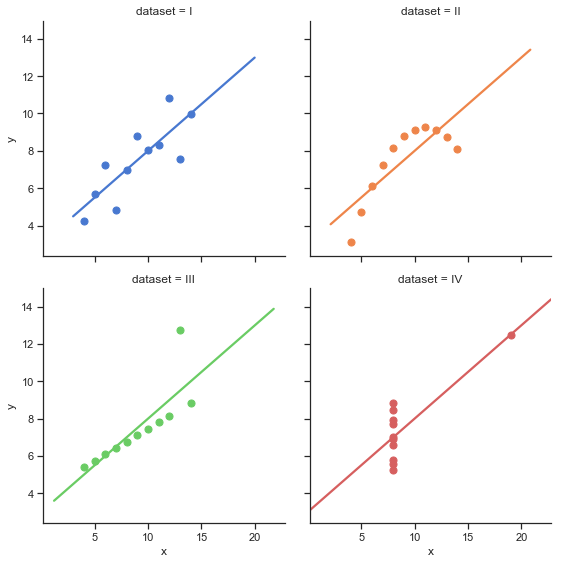

In [113]:
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

Well, would you be surprised if I told that the descriptive statistics for the numbers in these graphs are exactly the same? It turns out they do have the same descriptive statistics. In the table below I present the mean and variance for the x-values in each graph, and the mean and the variance for the y-values in each graph.

In [115]:
df.groupby('dataset').mean()

x         y
dataset               
I        9.0  7.500909
II       9.0  7.500909
III      9.0  7.500000
IV       9.0  7.500909

The descriptives are all the same! Anscombe put these special numbers together to illustrate the point of graphing your numbers. If you only look at your descriptives, you don't know what patterns in the data they are hiding. If you look at the graph, then you can get a better understanding.

### Datasaurus Dozen

If you thought that Anscombe's quartet was neat, you should take a look at the [Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats) [@matejka2017same]. Scroll down to see the examples. You will be looking at dot plots. The dot plots show many different patterns, including dinosaurs! What's amazing is that all of the dots have very nearly the same descriptive statistics. Just another reminder to look at your data, it might look like a dinosaur!



## Videos

### Measures of center: Mode

<iframe width="560" height="315" src="https://www.youtube.com/embed/hQ2p-QQpGso" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Measures of center: Median and Mean

<iframe width="560" height="315" src="https://www.youtube.com/embed/BopmCXCjq08" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Standard deviation part I

<iframe width="560" height="315" src="https://www.youtube.com/embed/8Yguf93s5dI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Standard deviation part II

<iframe width="560" height="315" src="https://www.youtube.com/embed/KodmsOXScBc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>
